In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
YMAX = 7-1
XMAX = 10-1
GOAL = (7,3)
START = (0,3)
#valid actions start at top left and run clockwise around the current point 
EPISODES = 175
#origin is at 0,0
ALPHA = .5
EPSILON = .1
GAMMA = 1

In [3]:
def walk(s,a,validActions,stochasticWind):
    if a not in validActions:
        raise ValueError('Invalid action provided')

    sX,sY = s
    aX,aY = a

    wY = (2 if sX >= 6 and sX <= 7 else \
                1 if sX >= 3 and sX <= 8 else \
                0)
    wY += random.randint(0,2) if wY > 0 and stochasticWind else 0

    dY = aY + wY
    dX = aX
    
    sXP = max(0,min(XMAX,sX+dX))
    sYP = max(0,min(YMAX,sY+dY))  

    sP = (sXP,sYP)

    r = 0 if sP == GOAL else -1

    return sP,r

In [4]:
#This function is only used for visualization 
def getMaxActionIndex(sG):
    return np.argmax(sG)

In [5]:
def getActionIndex(sG,validActions):
    rand = random.random()
    if rand > EPSILON:
        #do current greedy
        aIndex = np.argmax(sG)
    else: 
        aIndex = random.randint(0,len(validActions)-1)
    return aIndex

In [6]:
#index into Q as y then x
def exercise(kingMove: bool, stochasticWind: bool, showFigure: bool):
    validActions = [(-1,1),(0,1),(1,1),(1,0),(1,-1),(0,-1),(-1,-1),(-1,0)] if kingMove else [(0,1),(1,0),(0,-1),(-1,0)]

    Q = np.random.rand(10,7,len(validActions))

    times = [0]
    time = 0
    for _ in range(EPISODES):
        s = (0,3)
        aIndex = getActionIndex(Q[s],validActions)
        while(True):
            a = validActions[aIndex]

            sP,r = walk(s,a,validActions,stochasticWind)

            aPIndex = getActionIndex(Q[sP],validActions)
            aP = validActions[aPIndex]

            Q[s][aIndex] = Q[s][aIndex] + ALPHA * (r + (GAMMA * Q[sP][aPIndex]) - Q[s][aIndex])

            aIndex = aPIndex
            s = sP
            time += 1
            if (r == 0):
                break
        times.append(time)
    figure(times,kingMove,stochasticWind)
    if showFigure:
        policyVisual(Q,validActions)


In [7]:
def figure(times,kingMove,stochasticWind):
    plt.figure(figsize=(10,10))
    plt.plot(times,range(len(times)))
    plt.xlabel("Time Steps")
    plt.ylabel("Episodes")
    if not kingMove and not stochasticWind:
        plt.title("Windy Gridworld Accumulated Time")
        plt.savefig("../figures/example6-5/WindyGridworldAccumulatedTime.png")
    if kingMove and not stochasticWind:
        plt.title("Wind Gridworld with King Moves Accumulated Time")
        plt.savefig("../figures/exercise6-9/WindyGridworldKingMovesAccumulatedTime.png")
    if kingMove and stochasticWind:
        plt.title("Wind Gridworld with King Moves and Stochastic Wind Accumulated Time")
        plt.savefig("../figures/exercise6-10/WindyGridworldKingMovesStochasticWindAccumulatedTime.png")
    plt.show()

In [8]:
def policyVisual(Q,validActions):
    for x in Q:
        for y in x:
            print(str(validActions[getMaxActionIndex(y)]),end= "| ")
        print()

    #This graph is a little missleading x increases as you go down rows y increases left to right but x is the first number in the tuple

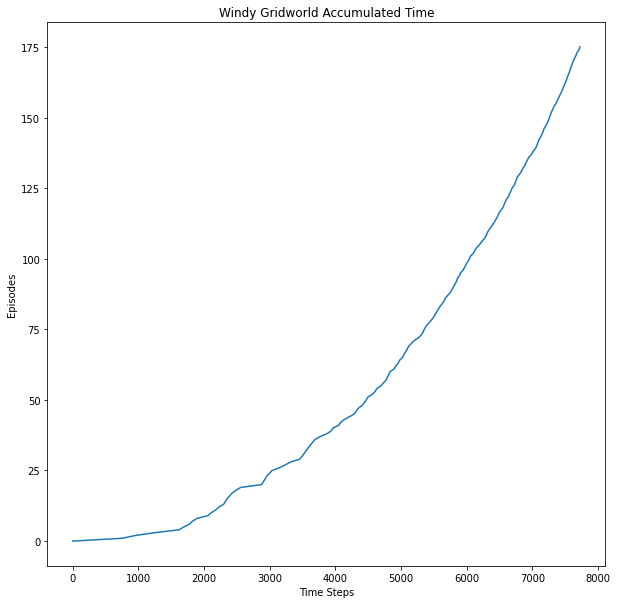

(1, 0)| (1, 0)| (0, -1)| (1, 0)| (1, 0)| (0, 1)| (0, -1)| 
(1, 0)| (1, 0)| (1, 0)| (1, 0)| (0, -1)| (1, 0)| (1, 0)| 
(0, -1)| (1, 0)| (0, -1)| (1, 0)| (1, 0)| (1, 0)| (1, 0)| 
(1, 0)| (1, 0)| (-1, 0)| (1, 0)| (1, 0)| (-1, 0)| (1, 0)| 
(0, -1)| (0, 1)| (0, 1)| (1, 0)| (1, 0)| (0, 1)| (1, 0)| 
(1, 0)| (1, 0)| (1, 0)| (1, 0)| (1, 0)| (1, 0)| (1, 0)| 
(-1, 0)| (1, 0)| (0, 1)| (0, -1)| (1, 0)| (1, 0)| (1, 0)| 
(0, -1)| (0, 1)| (0, -1)| (0, -1)| (0, -1)| (1, 0)| (1, 0)| 
(0, 1)| (0, -1)| (-1, 0)| (0, -1)| (1, 0)| (0, 1)| (1, 0)| 
(-1, 0)| (0, -1)| (-1, 0)| (0, -1)| (0, -1)| (0, -1)| (0, -1)| 


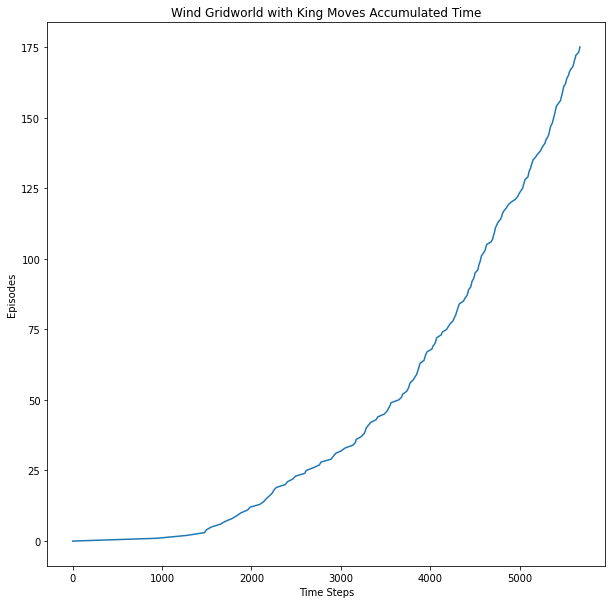

(1, 0)| (0, -1)| (1, 0)| (1, -1)| (-1, 1)| (-1, -1)| (-1, 1)| 
(1, 1)| (-1, 0)| (1, 0)| (1, 0)| (-1, 0)| (-1, -1)| (1, 1)| 
(-1, -1)| (1, -1)| (1, -1)| (1, -1)| (1, -1)| (1, -1)| (0, 1)| 
(1, -1)| (1, -1)| (1, -1)| (1, -1)| (-1, 0)| (-1, 1)| (-1, 1)| 
(1, -1)| (1, -1)| (1, -1)| (0, -1)| (1, 0)| (0, -1)| (1, -1)| 
(1, 1)| (1, -1)| (1, -1)| (0, -1)| (0, -1)| (0, 1)| (1, -1)| 
(0, -1)| (1, 0)| (1, -1)| (1, 0)| (-1, 1)| (1, 0)| (1, 1)| 
(0, 1)| (0, -1)| (1, 1)| (0, -1)| (1, 1)| (0, 1)| (1, 1)| 
(-1, -1)| (0, -1)| (-1, 0)| (-1, -1)| (-1, -1)| (1, -1)| (1, 0)| 
(1, 0)| (0, -1)| (1, 1)| (-1, 0)| (-1, -1)| (0, -1)| (0, -1)| 


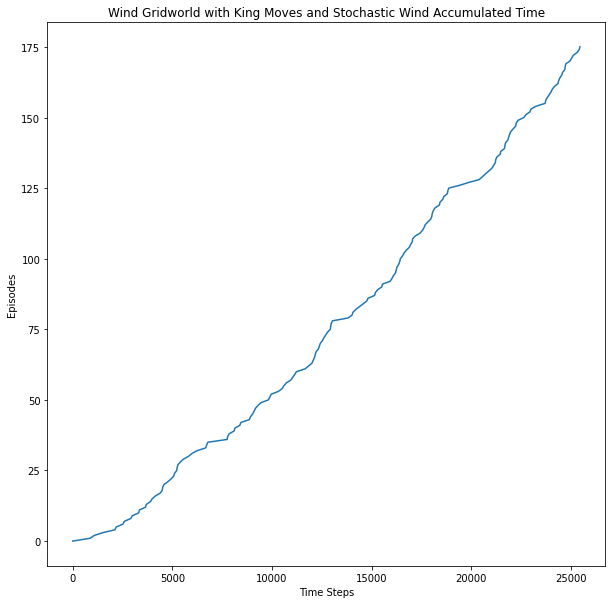

(1, 0)| (1, 0)| (-1, -1)| (-1, -1)| (-1, -1)| (0, -1)| (1, 0)| 
(1, 1)| (-1, 0)| (1, -1)| (1, -1)| (1, 0)| (1, -1)| (-1, 1)| 
(1, -1)| (1, -1)| (0, -1)| (0, 1)| (-1, -1)| (0, -1)| (0, -1)| 
(1, -1)| (1, -1)| (1, -1)| (1, 0)| (-1, -1)| (-1, 0)| (-1, -1)| 
(-1, 1)| (1, -1)| (0, -1)| (1, -1)| (-1, 0)| (-1, -1)| (-1, 1)| 
(-1, -1)| (0, -1)| (-1, -1)| (-1, -1)| (0, 1)| (-1, -1)| (1, 1)| 
(1, 0)| (-1, 1)| (1, -1)| (-1, 0)| (1, -1)| (-1, 0)| (1, -1)| 
(0, 1)| (-1, -1)| (-1, 0)| (1, 0)| (-1, -1)| (1, 1)| (1, 1)| 
(-1, 1)| (-1, -1)| (1, -1)| (-1, -1)| (1, 1)| (1, 1)| (1, 1)| 
(1, 0)| (-1, -1)| (0, -1)| (0, -1)| (1, -1)| (0, -1)| (1, -1)| 


In [9]:
exercise(False,False,True)
exercise(True,False,True)
exercise(True,True,True)

